In [2]:
import numpy as np
import Make_Data as MD
import matplotlib.pyplot as plt
%matplotlib inline 
from numpy import *

In [4]:
from PIL import Image
im=Image.open('/HDD/user/yoon/Yoon_SV4/N-DUDE_SV4/NeuralDUDE_Delta_Variation/Images/lena_512.tif').convert('L')
imarray=np.array(im)
n=imarray.shape[0]*imarray.shape[1]
im_bin=MD.make_binary_image(imarray)
x=im_bin.copy().reshape(n,)

nb_classes=2
alpha_size=2
mapping_size=3
loss_lines=12
dp=n+2*loss_lines*imarray.shape[0]+2*loss_lines*imarray.shape[1]+4*loss_lines**2

delta = np.arange(0.01, 0.11, 0.01)
L=[]
L_new=[]
z=[]
L_lower=np.array([[1,1,0],[0,1,0],[0,0,1],[1,0,1]])

for i in range(len(delta)):
    Temp=(delta[i], -delta[i]/(1-2*delta[i]), (1-delta[i])/(1-2*delta[i]),
          delta[i], (1-delta[i])/(1-2*delta[i]), -delta[i]/(1-2*delta[i]))
    L.append(Temp)
    L_new.append((1-delta[i])/(1-2*delta[i])-Temp)
   
    z[i*n:(i+1)*n]=MD.bsc(x,delta[i])
    
L=np.reshape(L,(alpha_size*len(delta), mapping_size))
L_new=np.reshape(L_new,(L.shape[0],L.shape[1]))
z=np.reshape(z,(len(delta), n))
z_two=np.reshape(z,(len(delta), imarray.shape[0], imarray.shape[1]))

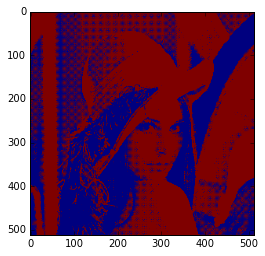

In [5]:
plt.imshow(im_bin,)

In [3]:
offset_pre = np.array(([[1,0], [-1,0], [0,1], [0,-1], [1,1], [-1,-1], [-1,1], [1,-1],
               [2,0], [-2,0], [0,2], [0,-2], [2,1], [-1,-2], [1,2], [-2,-1],
               [-1,2], [2,-1], [-2,1], [1,-2], [2,2], [-2,-2], [2,-2], [-2,2],
               [3,0], [-3,0], [0,3], [0,-3], [3,1], [-1,-3], [1,3], [-3,-1],
               [-3,1], [1,-3], [-1,3], [3,-1], [3,2], [-2,-3], [2,3], [-3,-2],
               [-2,3], [3,-2], [-3,2], [2,-3], [3,3], [-3,-3], [-3,3], [3,-3], 
               [4,0], [-4,0], [0,4], [0,-4], [-1,4], [1,-4], [4,1], [-4,-1], [-4,1], [4,-1], [1,4],
               [-1,-4], [4,2], [-2,-4], [2,4], [-4,-2], [-2,4], [4,-2], [-4,2], [2,-4], [4,3], [-3,-4],
               [3,4], [-4,-3], [-3,4], [4,-3], [-4,3], [3,-4], [4,4], [-4,-4], [-4,4], [4,-4],
               [5,0], [-5,0], [0,5], [0,-5], [-1,5], [1,-5], [5,1], [-5,-1], [-5,1],[5,-1],[1,5],[-1,-5],[5,2],[-2,-5],
               [2,5],[-5,-2],[-2,5],[5,-2],[-5,2],[2,-5],[5,3],[-3,-5],[3,5],[-5,-3],[-3,5],[5,-3],[-5,3],[3,-5],[5,4],
               [-4,-5],[4,5],[-5,-4],[-4,5],[5,-4],[-5,4],[4,-5],[5,5],[-5,-5], [-5,5], [5,-5], 
               [6,0], [-6,0], [0,6], [0,-6], [-1,6], [1,-6], [6,1], [-6,-1],
               [-6,1], [6,-1], [1,6], [-1,-6], [6,2], [-2,-6], [2,6], [-6,-2], [-2,6], [6,-2], [-6,2], [2,-6], [6,3], [-3,-6],
               [3,6], [-6,-3], [-3,6], [6,-3], [-6,3], [3,-6], [6,4], [-4,-6], [4,6], [-6,-4], [-4,6], [6,-4], [-6,4],[4,-6], 
               [5,6], [-5,-6], [6,5], [-6,-5], [-5,6], [6,-5], [-6,5], [5,-6], [6,6], [-6,-6], [-6,6], [6,-6],
               [7,0], [-7,0], [0,7], [0,-7], [-1,7], [1,-7], [7,1], [-7,-1], [-7,1], [7,-1], [1,7], [-1,-7], [7,2], [-2,-7], 
               [2,7], [-7,-2], [-2,7], [7,-2], [-7,2], [2,-7], [7,3], [-3,-7], [3,7], [-7,-3], [-3,7], [7,-3], [-7,3], [3,-7], 
               [7,4], [-4,-7], [4,7], [-7,-4], [-4,7], [7,-4], [-7,4], [4,-7], 
               [5,7], [-5,-7], [7,5], [-7,-5], [-5,7], [7,-5], [-7,5], [5,-7], [7,6], [-7,-6], [6,7], [-6,-7], [-6,7], [6,-7],
               [-7,6], [7,-6], [7,7], [-7,-7], [-7,7],[7,-7],
               [8,0], [-8,0], [0,8], [0,-8], [-1,8], [1,-8], [8,1], [-8,-1], [-8,1], [8,-1], [1,8], [-1,-8], [8,2], [-2,-8], 
               [2,8], [-8,-2], [-2,8], [8,-2], [-8,2], [2,-8], [8,3], [-3,-8], [3,8], [-8,-3], [-3,8], [7,-8], [-7,8], [3,-8], 
               [8,4], [-4,-8], [4,8], [-8,-4], [-4,8], [8,-4], [-8,4], [4,-8], 
               [5,8], [-5,-8], [8,5], [-8,-5], [-5,8], [8,-5], [-8,5], [5,-8], [8,6], [-8,-6], [6,8], [-6,-8], [-6,8], [6,-8],
               [-8,6], [8,-6], [8,7], [-8,-7], [-8,7],[8,-7],[7,8],[-7,-8],[-7,8],[7,-8],[8,8],[-8,-8],[8,-8],[-8,8],
               [9,0], [-9,0], [0,9], [0,-9], [-1,9], [1,-9], [9,1], [-9,-1], [-9,1], [9,-1], [1,9], [-1,-9], [9,2], [-2,-9], 
               [2,9], [-9,-2], [-2,9], [9,-2], [-9,2], [2,-9], [9,3], [-3,-9], [3,9], [-9,-3], [-3,9], [7,-9], [-7,9], [3,-9], 
               [9,4], [-4,-9], [4,9], [-9,-4], [-4,9], [9,-4], [-9,4], [4,-9], 
               [5,9], [-5,-9], [9,5], [-9,-5], [-5,9], [9,-5], [-9,5], [5,-9], [9,6], [-9,-6], [6,9], [-6,-9], [-6,9], [6,-9],
               [-9,6], [9,-6], [9,7], [-9,-7], [-9,7],[9,-7],[7,9],[-7,-9],[-7,9],[7,-9],[9,8],[-9,-8],[9,-8],[-9,8],
               [8,9],[-8,-9],[8,-9],[-8,9],[9,9],[9,-9],[-9,9],[-9,-9],
               [10,0], [-10,0], [0,10], [0,-10], [-1,10], [1,-10], [10,1], [-10,-1], [-10,1], [10,-1], [1,10], [-1,-10], [10,2], [-2,-10], 
               [2,10], [-10,-2], [-2,10], [10,-2], [-10,2], [2,-10], [10,3], [-3,-10], [3,10], [-10,-3], [-3,10], [7,-10], [-7,10], [3,-10], 
               [10,4], [-4,-10], [4,10], [-10,-4], [-4,10], [10,-4], [-10,4], [4,-10], 
               [5,10], [-5,-10], [10,5], [-10,-5], [-5,10], [10,-5], [-10,5], [5,-10], [10,6], [-10,-6], [6,10], [-6,-10], [-6,10], [6,-10],
               [-10,6], [10,-6], [10,7], [-10,-7], [-10,7],[10,-7],[7,10],[-7,-10],[-7,10],[7,-10],[10,8],[-10,-8],[10,-8],[-10,8],
               [8,10],[-8,-10],[8,-10],[-8,10],[10,9],[10,-9],[-10,9],[-10,-9],[9,10],[9,-10],[-9,10],[-9,-10],[10,10],[10,-10],
               [-10,10],[-10,-10],
               [11,0], [-11,0], [0,11], [0,-11], [-1,11], [1,-11], [11,1], [-11,-1], [-11,1], [11,-1], [1,11], [-1,-11], [11,2], [-2,-11], 
               [2,11], [-11,-2], [-2,11], [11,-2], [-11,2], [2,-11], [11,3], [-3,-11], [3,11], [-11,-3], [-3,11], [7,-11], [-7,11], [3,-11], 
               [11,4], [-4,-11], [4,11], [-11,-4], [-4,11], [11,-4], [-11,4], [4,-11], 
               [5,11], [-5,-11], [11,5], [-11,-5], [-5,11], [11,-5], [-11,5], [5,-11], [11,6], [-11,-6], [6,11], [-6,-11], [-6,11], [6,-11],
               [-11,6], [11,-6], [11,7], [-11,-7], [-11,7],[11,-7],[7,11],[-7,-11],[-7,11],[7,-11],[11,8],[-11,-8],[11,-8],[-11,8],
               [8,11],[-8,-11],[8,-11],[-8,11],[11,9],[11,-9],[-11,9],[-11,-9],[9,11],[9,-11],[-9,11],[-9,-11],[11,10],[11,-10],
               [-11,10],[-11,-10],[10,11],[10,-11],[-10,11],[-10,-11],[11,11],[11,-11],[-11,11],[-11,-11],
               [12,0], [-12,0], [0,12], [0,-12], [-1,12], [1,-12], [12,1], [-12,-1], [-12,1], [12,-1], [1,12], [-1,-12], [12,2], [-2,-12], 
               [2,12], [-12,-2], [-2,12], [12,-2], [-12,2], [2,-12], [12,3], [-3,-12], [3,12], [-12,-3], [-3,12], [7,-12], [-7,12], [3,-12], 
               [12,4], [-4,-12], [4,12], [-12,-4], [-4,12], [12,-4], [-12,4], [4,-12], 
               [5,12], [-5,-12], [12,5], [-12,-5], [-5,12], [12,-5], [-12,5], [5,-12], [12,6], [-12,-6], [6,12], [-6,-12], [-6,12], [6,-12],
               [-12,6], [12,-6], [12,7], [-12,-7], [-12,7],[12,-7],[7,12],[-7,-12],[-7,12],[7,-12],[12,8],[-12,-8],[12,-8],[-12,8],
               [8,12],[-8,-12],[8,-12],[-8,12],[12,9],[12,-9],[-12,9],[-12,-9],[9,12],[9,-12],[-9,12],[-9,-12],[12,10],[12,-10],
               [-12,10],[-12,-10],[10,12],[10,-12],[-10,12],[-10,-12],[12,11],[12,-11],[-12,11],[-12,-11],[11,12],[11,-12],[-11,12],[-11,-12],
               [12,12],[12,-12],[-12,12],[-12,-12]]))
offset = zeros((offset_pre.shape[0], offset_pre.shape[1]), dtype=np.int) 
offset[:,0] = offset_pre[:,1]
offset[:,1] = offset_pre[:,0]

In [4]:
res_file='./Neural_dude_Data_lena512'
np.savez(res_file, nb_classes=nb_classes, delta=delta, dp=dp, loss_lines=loss_lines, imarray=imarray, 
         im_bin=im_bin, x=x, z=z, z_two=z_two, L=L, L_lower=L_lower, L_new=L_new, offset=offset)
print "### Data generated ####"

### Data generated ####
